In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import pickle
import numpy as np
from src import agent
from adaptive_Agent import AdaptiveDiscretization
from eNet_Agent import eNet
import pandas as pd

In [2]:
param = '1'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rcParams.update({'font.size': 8})

In [3]:
fig = plt.figure(figsize=(7.2, 5.2))

<Figure size 518.4x374.4 with 0 Axes>

In [4]:
epLen = 5

         Unnamed: 0  iteration  epReward  Number of Balls  episode
episode                                                           
1509.0      18874.0       12.5  1.226022            500.0   1509.0
1609.0      37834.0       23.5  1.448576            500.0   1609.0
1709.0      36764.0       21.5  1.251809            500.0   1709.0
1809.0      22624.0       12.5  1.353842            500.0   1809.0
1909.0      23874.0       12.5  1.380607            500.0   1909.0
         Unnamed: 0  iteration  epReward  Number of Balls  episode
episode                                                           
1509.0      18874.0       12.5  1.421534          266.750   1509.0
1609.0      37834.0       23.5  1.519167          264.500   1609.0
1709.0      36764.0       21.5  1.428857          272.000   1709.0
1809.0      22624.0       12.5  1.432579          275.625   1809.0
1909.0      23874.0       12.5  1.472670          281.625   1909.0
         Unnamed: 0  iteration  epReward  Number of Balls  epi

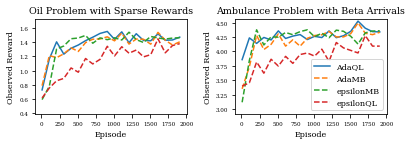

In [17]:
problem_type = 'oil'
problem = 'sparse'
param = '1'

name_adapt = './data/oil_'+problem+'_'+'adapt_'+param+'.csv'
name_adapt_model_based = './data/oil_'+problem+'_'+'adapt_model_'+param+'.csv'
# name_adapt_flag_model_based = './data/oil_'+problem+'_'+'adapt_flag_'+param+'.csv'
name_net = './data/oil_'+problem+'_'+'net_'+param+'.csv'
name_enet_model = './data/oil_'+problem+'_'+'net_model_'+param+'.csv'
fig_name = './figures/oil_'+problem+'_'+param+'.pdf'

dt_adapt_model = pd.read_csv(name_adapt_model_based).groupby(['episode']).mean()
dt_net_model = pd.read_csv(name_enet_model).groupby(['episode']).mean()
dt_adapt = pd.read_csv(name_adapt).groupby(['episode']).mean()
dt_net = pd.read_csv(name_net).groupby(['episode']).mean()

max_val = max(dt_adapt.tail(1)['epReward'].iloc[0], dt_adapt_model.tail(1)['epReward'].iloc[0], dt_net.tail(1)['epReward'].iloc[0], dt_net_model.tail(1)['epReward'].iloc[0])
min_val = min(dt_adapt.head(1)['epReward'].iloc[0], dt_adapt_model.head(1)['epReward'].iloc[0], dt_net.head(1)['epReward'].iloc[0], dt_net_model.head(1)['epReward'].iloc[0])

dt_adapt_model['episode'] = dt_adapt_model.index.values
dt_adapt_model = dt_adapt_model.iloc[::10, :]
dt_net_model['episode'] = dt_net_model.index.values
dt_net_model = dt_net_model.iloc[::10, :]
dt_adapt['episode'] = dt_adapt.index.values
dt_net['episode'] = dt_net.index.values
dt_net = dt_net.iloc[::10, :]
dt_adapt = dt_adapt.iloc[::10, :]


fig = plt.figure(figsize=(5.8, 3.5))
plt.subplot(2,2,1)

plt.plot(dt_adapt['episode'], dt_adapt['epReward'], label='AdaQL')
plt.plot(dt_adapt_model['episode'], dt_adapt_model['epReward'], label='AdaMB', linestyle='--')
# plt.plot(dt_adapt_model_flag['episode'], dt_adapt_model_flag['epReward'], label='ModelAdaptiveFlag', linestyle='--')
plt.plot(dt_net_model['episode'], dt_net_model['epReward'], label='epsilonMB', linestyle='--')
plt.plot(dt_net['episode'], dt_net['epReward'], label = 'epsilonQL', linestyle='--')

plt.ylim(min_val - .2,max_val+.2)
plt.xlabel('Episode')
plt.ylabel('Observed Reward')
# plt.legend()
plt.title('Oil Problem with Sparse Rewards')

print(dt_net.tail())
print(dt_adapt.tail())
print(dt_adapt_model.tail())

problem = 'beta'
param = '0'


name_adapt = './data/ambulance_'+problem+'_'+'adapt_'+param+'.csv'
name_adapt_model_based = './data/ambulance_'+problem+'_'+'adapt_model_'+param+'.csv'
# name_adapt_flag_model_based = './data/oil_'+problem+'_'+'adapt_flag_'+param+'.csv'
name_net = './data/ambulance_'+problem+'_'+'net_'+param+'.csv'
name_enet_model = './data/ambulance_'+problem+'_'+'net_model_'+param+'.csv'
# fig_name = './figures/ambulance_'+problem+'_'+param+'.pdf'

dt_adapt_model = pd.read_csv(name_adapt_model_based).groupby(['episode']).mean()
dt_net_model = pd.read_csv(name_enet_model).groupby(['episode']).mean()
dt_adapt = pd.read_csv(name_adapt).groupby(['episode']).mean()
dt_net = pd.read_csv(name_net).groupby(['episode']).mean()

max_val = max(dt_adapt.tail(1)['epReward'].iloc[0], dt_adapt_model.tail(1)['epReward'].iloc[0], dt_net.tail(1)['epReward'].iloc[0], dt_net_model.tail(1)['epReward'].iloc[0])
min_val = min(dt_adapt.head(1)['epReward'].iloc[0], dt_adapt_model.head(1)['epReward'].iloc[0], dt_net.head(1)['epReward'].iloc[0], dt_net_model.head(1)['epReward'].iloc[0])

dt_adapt_model['episode'] = dt_adapt_model.index.values
dt_adapt_model = dt_adapt_model.iloc[::10, :]
dt_net_model['episode'] = dt_net_model.index.values
dt_net_model = dt_net_model.iloc[::10, :]
dt_adapt['episode'] = dt_adapt.index.values
dt_net['episode'] = dt_net.index.values
dt_net = dt_net.iloc[::10, :]
dt_adapt = dt_adapt.iloc[::10, :]

plt.subplot(2,2,2)

plt.plot(dt_adapt['episode'], dt_adapt['epReward'], label='AdaQL')
plt.plot(dt_adapt_model['episode'], dt_adapt_model['epReward'], label='AdaMB', linestyle='--')
# plt.plot(dt_adapt_model_flag['episode'], dt_adapt_model_flag['epReward'], label='ModelAdaptiveFlag', linestyle='--')
plt.plot(dt_net_model['episode'], dt_net_model['epReward'], label='epsilonMB', linestyle='--')
plt.plot(dt_net['episode'], dt_net['epReward'], label = 'epsilonQL', linestyle='--')
max_val = max(dt_adapt.tail(1)['epReward'].iloc[0], dt_adapt_model.tail(1)['epReward'].iloc[0], dt_net.tail(1)['epReward'].iloc[0], dt_net_model.tail(1)['epReward'].iloc[0])


plt.ylim(min_val-.2,max_val+.2)
plt.xlabel('Episode')
plt.ylabel('Observed Reward')
plt.legend()
plt.title('Ambulance Problem with Beta Arrivals')

print(dt_net.tail())
print(dt_adapt.tail())
print(dt_adapt_model.tail())

plt.tight_layout()
# fig.savefig('figures/combine_plot_paper.pdf', bbox_inches = 'tight',
#     pad_inches = 0.01, dpi=900)
plt.show()





